In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

sns.set_style("whitegrid")
sns.color_palette("BuGn_r", 10)
sns.set_palette("BuGn_r")

In [6]:
kaup = pd.read_csv('fjolbyli_all_variables_MEAN.csv', usecols=('date', 'byggar', 'einflm', 'lod_flm','verd_m2'))
indep = pd.read_csv('20_independent_variables_LSTM.csv', parse_dates=True)

In [7]:
df = pd.merge(kaup,indep, how='left', on='date')

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,date,byggar,einflm,lod_flm,verd_m2,fjöldi_kaupsamninga,auglyst_serbyli,auglyst_fjolbyli,solutimi,Verðtryggð lán,...,visitala_rvk_%,verdbolga_%,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær,"Eigendur, skuldlaust",Eigendur m. lán,"Leigjendur, alls"
0,2006-04-01,1988.000000,112.300000,1285.000000,219.946572,598.40,0.48,2.05,6.21,87.42,...,1.2,1.070205,0.426995,0.421847,0.472678,0.390313,0.354208,17.025,65.85,17.125
1,2006-05-01,1961.400000,87.140000,3860.200000,188.260192,617.00,0.48,2.05,6.21,87.31,...,-0.2,1.482423,0.427148,0.421584,0.474830,0.391902,0.355180,16.700,66.20,17.100
2,2006-06-01,1974.264407,98.495932,3491.331186,218.433463,472.74,0.48,2.05,6.21,87.20,...,0.6,1.001669,0.427300,0.421320,0.476982,0.393491,0.356153,16.375,66.55,17.075
3,2006-07-01,1975.274678,96.203004,3657.852361,217.224667,436.96,0.48,2.05,6.21,87.09,...,-1.7,0.413223,0.427453,0.421056,0.479134,0.395080,0.357125,16.050,66.90,17.050
4,2006-08-01,1973.262295,96.467213,3343.376639,220.890267,406.92,0.48,2.05,6.21,86.98,...,2.4,0.288066,0.427606,0.420792,0.481286,0.396669,0.358097,15.725,67.25,17.025


In [9]:
fm2 = df['verd_m2']
df.drop('verd_m2', axis=1, inplace=True)
df.insert(1, 'verd_m2', fm2)
df.head()

,date,verd_m2,byggar,einflm,lod_flm,fjöldi_kaupsamninga,auglyst_serbyli,auglyst_fjolbyli,solutimi,Verðtryggð lán,...,visitala_rvk_%,verdbolga_%,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær,"Eigendur, skuldlaust",Eigendur m. lán,"Leigjendur, alls"
0,2006-04-01,219.946572,1988.000000,112.300000,1285.000000,598.40,0.48,2.05,6.21,87.42,...,1.2,1.070205,0.426995,0.421847,0.472678,0.390313,0.354208,17.025,65.85,17.125
1,2006-05-01,188.260192,1961.400000,87.140000,3860.200000,617.00,0.48,2.05,6.21,87.31,...,-0.2,1.482423,0.427148,0.421584,0.474830,0.391902,0.355180,16.700,66.20,17.100
2,2006-06-01,218.433463,1974.264407,98.495932,3491.331186,472.74,0.48,2.05,6.21,87.20,...,0.6,1.001669,0.427300,0.421320,0.476982,0.393491,0.356153,16.375,66.55,17.075
3,2006-07-01,217.224667,1975.274678,96.203004,3657.852361,436.96,0.48,2.05,6.21,87.09,...,-1.7,0.413223,0.427453,0.421056,0.479134,0.395080,0.357125,16.050,66.90,17.050
4,2006-08-01,220.890267,1973.262295,96.467213,3343.376639,406.92,0.48,2.05,6.21,86.98,...,2.4,0.288066,0.427606,0.420792,0.481286,0.396669,0.358097,15.725,67.25,17.025


In [10]:
df.shape

(194, 24)

In [11]:
train_dates = pd.to_datetime(df['date'])
print(train_dates.tail(4))

190   2022-02-01
191   2022-03-01
192   2022-04-01
193   2022-05-01
Name: date, dtype: datetime64[ns]


In [12]:
#Variables for training
cols = list(df)[1:]
#Date is not used in training. 
print(cols)

['verd_m2', 'byggar', 'einflm', 'lod_flm', 'fjöldi_kaupsamninga', 'auglyst_serbyli', 'auglyst_fjolbyli', 'solutimi', 'Verðtryggð lán', 'erlend_lan', 'Óverðtryggð lán', 'overdtryggt', 'verdtryggt', 'visitala_rvk_%', 'verdbolga_%', 'Reykjavík', 'Kópavogur', 'Garðabær', 'Hafnarfjörður', 'Mosfellsbær', 'Eigendur, skuldlaust', 'Eigendur m. lán', 'Leigjendur, alls']


In [13]:
df_for_training = df[cols].astype(float)

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [101]:
trainX = []
trainY = []

n_future = 2   # Number of months we want to look into the future based on the past months.
n_past = 3  # Number of past months we want to use to predict the future.

In [102]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (190, 3, 23).
trainY shape == (190, 1).


In [103]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 64)             22528     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,977
Trainable params: 34,977
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
6/6 [==============================] - 2s 67ms/step - loss: 0.5929 - val_loss: 3.5283
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4191 - val_loss: 2.6657
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.2519 - val_loss: 1.5704
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1647 - val_loss: 0.5818
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1129 - val_loss: 0.5673
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0671 - val_loss: 0.6256
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0522 - val_loss: 0.4922
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0413 - val_loss: 0.3080
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0340 - val_loss: 0.4839
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0328 - val_loss: 0.6414
Epoch 11/100
6/6 [=====

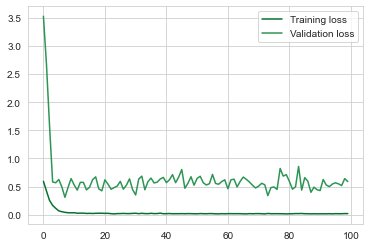

In [104]:
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [105]:
n_past = 188
n_days_for_prediction=189  #let us predict past 5 months

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='m').tolist()
print(predict_period_dates)

[Timestamp('2006-10-31 00:00:00', freq='M'), Timestamp('2006-11-30 00:00:00', freq='M'), Timestamp('2006-12-31 00:00:00', freq='M'), Timestamp('2007-01-31 00:00:00', freq='M'), Timestamp('2007-02-28 00:00:00', freq='M'), Timestamp('2007-03-31 00:00:00', freq='M'), Timestamp('2007-04-30 00:00:00', freq='M'), Timestamp('2007-05-31 00:00:00', freq='M'), Timestamp('2007-06-30 00:00:00', freq='M'), Timestamp('2007-07-31 00:00:00', freq='M'), Timestamp('2007-08-31 00:00:00', freq='M'), Timestamp('2007-09-30 00:00:00', freq='M'), Timestamp('2007-10-31 00:00:00', freq='M'), Timestamp('2007-11-30 00:00:00', freq='M'), Timestamp('2007-12-31 00:00:00', freq='M'), Timestamp('2008-01-31 00:00:00', freq='M'), Timestamp('2008-02-29 00:00:00', freq='M'), Timestamp('2008-03-31 00:00:00', freq='M'), Timestamp('2008-04-30 00:00:00', freq='M'), Timestamp('2008-05-31 00:00:00', freq='M'), Timestamp('2008-06-30 00:00:00', freq='M'), Timestamp('2008-07-31 00:00:00', freq='M'), Timestamp('2008-08-31 00:00:00'

In [106]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

6/6 [==============================] - 0s 1ms/step


In [107]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [108]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'verd_m2':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

C:\Users\halld\AppData\Local\Temp\ipykernel_26552\279094052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])
c:\Anaconda\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

<AxesSubplot:xlabel='date', ylabel='verd_m2'>

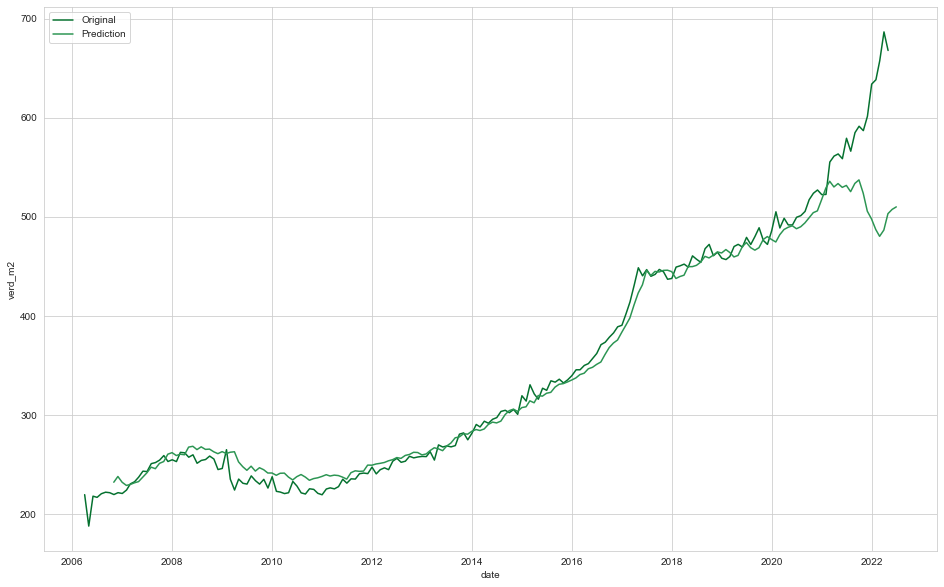

In [109]:
original = df[['date', 'verd_m2']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2006-1-1']

plt.figure(figsize=(16,10))
sns.lineplot(original['date'], original['verd_m2'], label='Original')
sns.lineplot(df_forecast['date'], df_forecast['verd_m2'], label='Prediction')